# IRIS DATASET

El conjunto de datos de Iris es conocido porque fue introducido por Ronald A. Fisher en 1936, es simple y accesible, con solo 150 muestras y 4 características, contiene tres clases bien definidas (Iris setosa, Iris versicolor e Iris virginica), es aplicable a múltiples algoritmos de aprendizaje automático como K-Nearest Neighbors, Support Vector Machines y árboles de decisión, es ampliamente utilizado en la literatura y educación, y es ideal para la visualización y el análisis exploratorio de datos.

In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from src.DataPreparer import DataPreparer
from src.FormalContext import FormalContext
from src.OtherModels import *
from src import FCADecisionTree as FCADtree

import pandas as pd

DATA_CSV_FILE_PATH = 'C:\\Users\\Focus\\Desktop\\TFG\\TFG\\fca-decision-tree-classifier\\datasets\\real_datasets\\iris.csv'
TREES_MAX_DEPTH = 4

df = pd.read_csv(DATA_CSV_FILE_PATH)
df.describe()


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


# Prueba inicial del árbol básico c4.5, obtención de sus umbrales

In [4]:
from src.DecisionTreeC45 import DecisionTreeC45
from sklearn.model_selection import train_test_split

data = df.copy()
taget_column = -1

X = data.iloc[:, :-1]  # Todas las columnas excepto la última
y = data.iloc[:, -1]   # La última columna

# Convertir X a una lista de listas y y a una lista
X_list = X.values.tolist()
y_list = y.values.tolist()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_list, y_list, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisión C4.5
attribute_names = X.columns.tolist()

decision_tree_c45 = DecisionTreeC45(attribute_names=attribute_names, max_depth=TREES_MAX_DEPTH)
decision_tree_c45.train_tree(X_train, y_train)


predictions_treec45 = decision_tree_c45.classify_instances(X_test)

decision_tree_c45.evaluation_metrics(y_test, predictions_treec45, average='macro') 
decision_tree_c45.print_tree_structure()

# Obtener los umbrales de los atributos continuos
thresholds = decision_tree_c45.get_thresholds()

print("Umbrales de los atributos continuos:", thresholds)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Attribute: petal.length <= 2.45
  Decision: Setosa
  Attribute: petal.width <= 1.75
    Attribute: petal.length <= 5.35
      Attribute: petal.length <= 4.95
        Decision: Versicolor
        Decision: Virginica
      Decision: Virginica
    Attribute: petal.length <= 4.85
      Attribute: sepal.length <= 5.95
        Decision: Versicolor
        Decision: Virginica
      Decision: Virginica
Umbrales de los atributos continuos: {2: [2.45, 5.35, 4.95, 4.85], 3: [1.75], 0: [5.95]}

# Preparado de los datos, utilización de los mismos umbrales del C4.5

In [5]:
data_preparer = DataPreparer()
data_preparer.prepare_csvfile_data(
    file_path=DATA_CSV_FILE_PATH,
    discretizing_thresholds=thresholds  # Pasar los umbrales obtenidos del modelo C4.5
)

X_train, X_test, y_train, y_test = data_preparer.get_train_test_split_data_binarized()
labeled_train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)

objects = list(labeled_train_data.index)
properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']
num_objects = len(objects)
num_properties = len(properties)

print(f"Number of Objects: {num_objects}")
print(f"Number of Properties-Attributes: {num_properties}")

labeled_train_data.info()

Number of Objects: 119
Number of Properties-Attributes: 32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sepal.length_0    119 non-null    float64
 1   sepal.length_1    119 non-null    float64
 2   sepal.width_2.0   119 non-null    float64
 3   sepal.width_2.2   119 non-null    float64
 4   sepal.width_2.3   119 non-null    float64
 5   sepal.width_2.4   119 non-null    float64
 6   sepal.width_2.5   119 non-null    float64
 7   sepal.width_2.6   119 non-null    float64
 8   sepal.width_2.7   119 non-null    float64
 9   sepal.width_2.8   119 non-null    float64
 10  sepal.width_2.9   119 non-null    float64
 11  sepal.width_3.0   119 non-null    float64
 12  sepal.width_3.1   119 non-null    float64
 13  sepal.width_3.2   119 non-null    float64
 14  sepal.width_3.3   119 non-null    float64
 15  sepal.width_3.4   119 non-null  

# Computación del contexto formal y prueba del árbol FCA:

Tamaño máximo del contexto: 3808
Tiempo de ejecución para el retículo: 0.02 segundos

Finalizando Algoritmo:
Número de conceptos formales: 156

Vector a clasificar:  ['sepal.length_1', 'sepal.width_2.8', 'petal.length_1', 'petal.width_0']
└──Nivel 0: Nodo actual (Intent: [], Label: ROOT), Mejor coincidencia (Intent: [1])
│   └──Nivel 1: Nodo actual (Intent: [1], Label: Virginica), Mejor coincidencia (Intent: [1, 30])
│   │   └──Nivel 2: Nodo actual (Intent: [1, 30], Label: Versicolor), Mejor coincidencia (Intent: [1, 3, 30])
│   │   │   └──Nivel 3: Nodo actual (Intent: [1, 3, 30], Label: Versicolor), Mejor coincidencia (Intent: [1, 3, 26, 30])
Resultado final: Nodo (Intent: [1, 3, 26, 30], Label: Versicolor)

Vector a clasificar:  ['sepal.length_0', 'sepal.width_3.8', 'petal.length_0', 'petal.width_0']
└──Nivel 0: Nodo actual (Intent: [], Label: ROOT), Mejor coincidencia (Intent: [0])
Resultado final: Nodo (Intent: [0], Label: Setosa)

Vector a clasificar:  ['sepal.length_1', 'sepal.wi

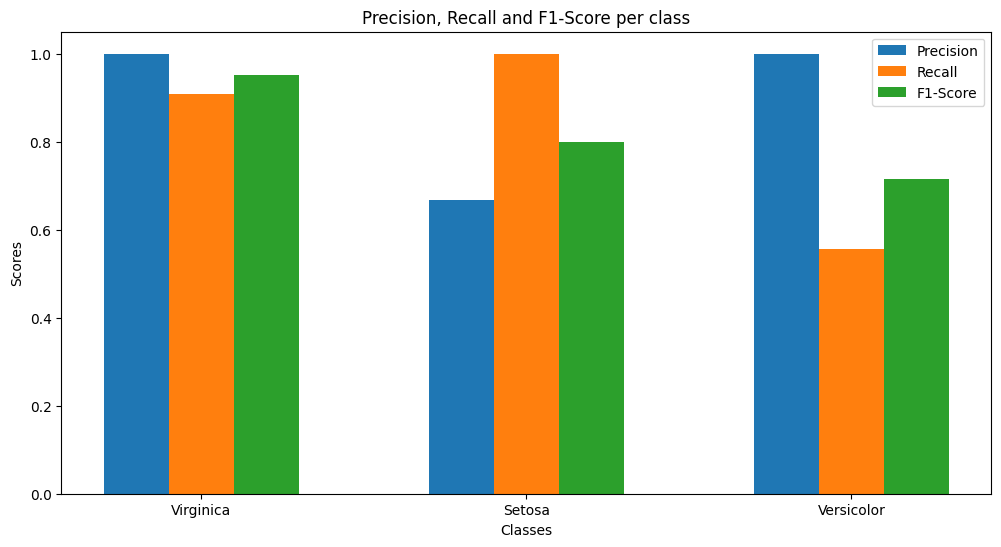

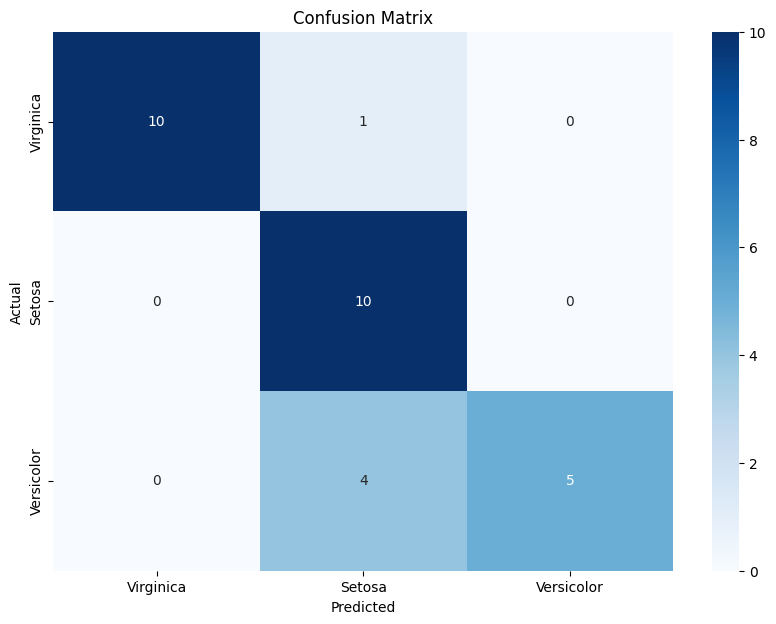

Execution Time: 0.39578795433044434 seconds
--------------------------------------------------
└── [0 - class-label: ROOT]
│   └── [1 - class-label: Setosa]
│   └── [46 - class-label: Virginica]
│   │   └── [108 - class-label: Virginica]
│   │   └── [111 - class-label: Versicolor]
│   │   │   └── [47 - class-label: Versicolor]
│   │   │   │   └── [48 - class-label: Versicolor]
│   │   │   │   └── [49 - class-label: Virginica]
│   │   │   └── [109 - class-label: Virginica]
│   └── [115 - class-label: Virginica]
│   │   └── [7 - class-label: Versicolor]
│   │   └── [51 - class-label: Virginica]
│   │   └── [117 - class-label: Versicolor]
│   │   └── [118 - class-label: Virginica]
│   └── [119 - class-label: Versicolor]
│   │   └── [56 - class-label: Virginica]
│   │   └── [120 - class-label: Versicolor]
│   └── [121 - class-label: Versicolor]
│   └── [123 - class-label: Virginica]
│   │   └── [12 - class-label: Virginica]
│   │   │   └── [13 - class-label: Versicolor]
│   │   │   └── [16

In [6]:
formal_context = FormalContext(labeled_data=labeled_train_data)
max_context_size = num_objects * num_properties
print(f"Tamaño máximo del contexto: {formal_context.max_context_size}")  
formal_context.build_lattice(debug=True, compute_parents_childs=True)

print("\nFinalizando Algoritmo:")
print("Número de conceptos formales:", len(formal_context.get_all_concepts_lattice()))

start_time = time.time()
decision_treeFCA = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=TREES_MAX_DEPTH)
results = decision_treeFCA.evaluate(X_test, y_test, debug=True, plot_results=True)
end_time = time.time()

# Imprimir el tiempo de ejecución
print(f"Execution Time: {end_time - start_time} seconds")
print("--------------------------------------------------")
#decision_treeFCA.print_tree_complete()
decision_treeFCA.print_tree_logic() 
complexity_info = decision_treeFCA.display_tree_complexity()
print(complexity_info)
print(results) 

# Prueba del árbol básico ID3

In [7]:
# Evaluación del modelo DecisionTreeID3
from src.DecisionTreeID3 import DecisionTreeID3

decision_treeid3 = DecisionTreeID3(attribute_names=properties, max_depth=TREES_MAX_DEPTH)

decision_treeid3.train_tree(data_preparer.X_train.values.tolist(), data_preparer.y_train.tolist())

predictions_treeid3 = decision_treeid3.classify_instances(X_test.values.tolist())

decision_treeid3.evaluation_metrics(y_test, predictions_treeid3, average='macro')
decision_treeid3.print_tree_structure()


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Attribute: petal.length_0
Category: 0.0
  Attribute: petal.width_0
  Category: 0.0
    Attribute: petal.length_1
    Category: 0.0
      Decision: Virginica
    Category: 1.0
      Attribute: sepal.length_0
      Category: 0.0
        Decision: Virginica
      Category: 1.0
        Decision: Versicolor
  Category: 1.0
    Attribute: petal.length_1
    Category: 0.0
      Attribute: petal.length_2
      Category: 0.0
        Decision: Virginica
      Category: 1.0
        Decision: 

Prueba de cross-validación:

In [8]:
decision_treeid3.test_CV(X, y, random_state=42, attribute_names=attribute_names, k=5, max_depth=4)

Exactitud media: 0.8400
Precisión media: 0.8583
Recall media: 0.8509
F1-Score media: 0.8330
Desviación estándar de la Exactitud: 0.0533


# Prueba adicional de los demás modelos

Prueba con preprocesamiento, discretizados y binarizados:

In [9]:
CROSS_VALIDATION = 1
METRICS_AVERAGE = 'weighted'

tryOtherModels(X_train, X_test, y_train, y_test, CROSS_VALIDATION, selected_average=METRICS_AVERAGE)

Evaluating model: Logistic Regression
Classifier: OneVsRestClassifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Execution Time: 0.02453923225402832 seconds
--------------------------------------------------
Evaluating model: SVM
Classifier: SVC
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Execution Time: 0.01203608512878418 seconds
--------------------------------------------------
Evaluating model: Decision Tree
Classifier: DecisionTreeClassifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Execution Time: 0.009499073028564453 seconds
--------------------------------------------------
Evaluating model: K-Nearest Neighbors
Classifier: KNeighborsClassifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Execution Time: 0.0828478336

Prueba sin preprocesamiento, con los datos originales

In [10]:
CROSS_VALIDATION = 1
METRICS_AVERAGE = 'weighted'

data = df.copy()
taget_column = -1

X = data.iloc[:, :-1]  #
y = data.iloc[:, -1]   

X_list = X.values.tolist()
y_list = y.values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X_list, y_list, test_size=0.2, random_state=42)

tryOtherModels(X_train, X_test, y_train, y_test, CROSS_VALIDATION, selected_average=METRICS_AVERAGE)

Evaluating model: Logistic Regression
Classifier: OneVsRestClassifier
Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
Recall: 0.9666666666666667
F1 Score: 0.9664109121909632
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Execution Time: 0.025030136108398438 seconds
--------------------------------------------------
Evaluating model: SVM
Classifier: SVC
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Execution Time: 0.00751495361328125 seconds
--------------------------------------------------
Evaluating model: Decision Tree
Classifier: DecisionTreeClassifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Execution Time: 0.0065119266510009766 seconds
--------------------------------------------------
Evaluating model: K-Nearest Neighbors
Classifier: KNeighborsClassifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[1

# TEST ESTADÍSTICO DEL FCATREE CON EL ID3 Y  EL C4.5

## Parámetros globales:

In [11]:
CLASSES_THRESHOLD = 0.6 # % de similitud de clases para la poda en el FCATREE
debug=False
max_depth = 5
random_state = 42
test_size = 0.3


OTHER_TREE_MODEL = "ID3" #primera prueba con el ID3

## Definición de funciones

In [12]:
import numpy as np
import pandas as pd
from scipy import stats
from mlxtend.evaluate import mcnemar_table, mcnemar
from scipy.stats import t as t_dist
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# test t de paridad
def paired_t_test(p):
        p_hat = np.mean(p)
        n = len(p)
        den = np.sqrt(sum([(diff - p_hat)**2 for diff in p]) / (n - 1))
        t = (p_hat * (n**(1/2))) / den
        
        p_value = t_dist.sf(t, n-1)*2
        
        return t, p_value

# PRUEBA DE TEST Z PARA DOS PORPORCIONES
def two_proportions_test(y_true, y_pred1, y_pred2):
    success_a = np.sum(y_pred1 == y_true)
    success_b = np.sum(y_pred2 == y_true)
    n_a = len(y_true)
    n_b = len(y_true)
    
    prop_a = success_a / n_a
    prop_b = success_b / n_b
    
    var_a = (prop_a * (1 - prop_a)) / n_a
    var_b = (prop_b * (1 - prop_b)) / n_b
    
    if var_a + var_b == 0:
        return 0, 1  # No hay diferencia significativa si no hay variabilidad
    
    z = (prop_a - prop_b) / np.sqrt(var_a + var_b)
    p_value = stats.norm.sf(abs(z)) * 2  # Test de dos colas
    
    return z, p_value

# PRUEBA DE MCNEMAR
def mcnemar_test(y_true, y_pred1, y_pred2):
    table = mcnemar_table(y_target=np.array(y_true), 
                          y_model1=np.array(y_pred1), 
                          y_model2=np.array(y_pred2))
    chi2, p = mcnemar(ary=table, corrected=True)
    return chi2, p

# PRUEBA T PAREADA
def resampled_paired_ttest(data_preparer, n_tests=30, test_size=None, max_depth=None):
    global random_state, OTHER_TREE_MODEL, CLASSES_THRESHOLD, debug
    p_ = []
    rng = np.random.RandomState(random_state)
    for i in range(n_tests):
        randint = rng.randint(low=0, high=32767)
        X_train, X_test, y_train, y_test = data_preparer.get_train_test_split_data_binarized(random_state=randint, test_size=test_size)

        # para el modelo FCA
        labeled_train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
        formal_context = FormalContext(labeled_data=labeled_train_data)
        formal_context.build_lattice(debug=False, compute_parents_childs=True)
        fca_model = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=max_depth, classes_threshold=CLASSES_THRESHOLD)
        
        # para el otro modelo ID3
        properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']

        if(OTHER_TREE_MODEL == "C45"):
            other_tree_model = DecisionTreeC45(attribute_names=properties, max_depth=max_depth)
        else:
            other_tree_model = DecisionTreeID3(attribute_names=properties, max_depth=max_depth)


        other_tree_model.train_tree(data_preparer.X_train.values.tolist(), data_preparer.y_train.tolist())

        
        accuracy = accuracy_score(y_test, fca_model.classify_instances(X_test))
        if(debug):
            print("FCAMODEL: ", accuracy)
        accuracy = accuracy_score(y_test, other_tree_model.classify_instances(X_test.values.tolist()))
        if(debug):
            print("OTHER: ", accuracy)
        

        acc1 = accuracy_score(y_test, fca_model.classify_instances(X_test))
        acc2 = accuracy_score(y_test, other_tree_model.classify_instances(X_test.values.tolist()))
        p_.append(acc1 - acc2)

    t_stat, p_value = paired_t_test(p_)
    return t_stat, p_value



# CV DE 5 ITERACIONES DE 2 PLIEGUES
def cross_val_5x2_test(data_preparer, test_size, max_depth):
    global random_state, OTHER_TREE_MODEL, CLASSES_THRESHOLD,  debug

    def five_two_statistic(p1, p2):
        p1 = np.array(p1)
        p2 = np.array(p2)
        p_hat = (p1 + p2) / 2
        s = (p1 - p_hat)**2 + (p2 - p_hat)**2
        t = p1[0] / np.sqrt(1/5. * sum(s))
        
        p_value = t_dist.sf(t, 5)*2
        
        return t, p_value

    p_1 = []
    p_2 = []

    rng = np.random.RandomState(42)
    for i in range(5):
        randint = rng.randint(low=0, high=32767)
        X_train, X_test, y_train, y_test = data_preparer.get_train_test_split_data_binarized(debug=debug, random_state=randint, test_size=test_size)

        # p1 evaluacion de train-test
            # para el modelo FCA
        labeled_train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
        formal_context = FormalContext(labeled_data=labeled_train_data)
        formal_context.build_lattice(debug=False, compute_parents_childs=True)
        fca_model = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=max_depth, classes_threshold=CLASSES_THRESHOLD)
        
            # para el otro modelo ID3
        properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']

        if(OTHER_TREE_MODEL == "C45"):
            other_tree_model = DecisionTreeC45(attribute_names=properties, max_depth=max_depth)
        else:
            other_tree_model = DecisionTreeID3(attribute_names=properties, max_depth=max_depth)


        other_tree_model.train_tree(data_preparer.X_train.values.tolist(), data_preparer.y_train.tolist())


        acc1 = accuracy_score(y_test, fca_model.classify_instances(X_test))
        acc2 = accuracy_score(y_test, other_tree_model.classify_instances(X_test.values.tolist()))
        p_1.append(acc1 - acc2)


        # p2 evaluacion de test-train
            # para el modelo FCA
        labeled_train_data = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)
        formal_context = FormalContext(labeled_data=labeled_train_data)
        formal_context.build_lattice(debug=False, compute_parents_childs=True)
        fca_model = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=max_depth, classes_threshold=CLASSES_THRESHOLD)
        
            # para el otro modelo ID3
        properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']

        if(OTHER_TREE_MODEL == "C45"):
            other_tree_model = DecisionTreeC45(attribute_names=properties, max_depth=max_depth)
        else:
            other_tree_model = DecisionTreeID3(attribute_names=properties, max_depth=max_depth)


        other_tree_model.train_tree(data_preparer.X_test.values.tolist(), data_preparer.y_test.tolist())

        acc1 = accuracy_score(y_train, fca_model.classify_instances(X_train))
        acc2 = accuracy_score(y_train, other_tree_model.classify_instances(X_train.values.tolist()))
        p_2.append(acc1 - acc2)

    t, p = five_two_statistic(p_1, p_2)
    return t, p


def test_statistical(random_state, test_size, max_depth, data_preparer):
    X_train, X_test, y_train, y_test = data_preparer.get_train_test_split_data_binarized(debug=debug, random_state=random_state, test_size=test_size)

    print("#############################################################################")
    if(debug):
        print("\n\n\ESTRUCTURAS de datos de X e Y:\n", X, y, X_train, X_test, y_train, y_test)

    # Inicializar y proabr el modelo FCA
    labeled_train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
    formal_context = FormalContext(labeled_data=labeled_train_data)
    formal_context.build_lattice(debug=False, compute_parents_childs=True)
    print("\nFinalizando Algoritmo del retículo:")
    print("Número de conceptos formales:", len(formal_context.get_all_concepts_lattice()))
    fca_model = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=max_depth, classes_threshold=CLASSES_THRESHOLD)
    
    if(debug):
        fca_model.print_tree_logic()
        fca_model.print_tree_structure()

    fca_predicted_labels = fca_model.classify_instances(X_test)

    # Inicializar y probar el otro modelo
    properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']
    
    if(OTHER_TREE_MODEL == "C45"):
        other_tree_model = DecisionTreeC45(attribute_names=properties, max_depth=max_depth)
    else:
        other_tree_model = DecisionTreeID3(attribute_names=properties, max_depth=max_depth)

    other_tree_model.train_tree(data_preparer.X_train.values.tolist(), data_preparer.y_train.tolist())
    predictions_other_tree= other_tree_model.classify_instances(X_test.values.tolist())

    # Two Proportions Test
    z, p_proportions = two_proportions_test(y_test , fca_predicted_labels, predictions_other_tree)
    #print("two_proportions_test:", z, p_proportions)

     # McNemar’s Test
    chi2_mcnemar, p_mcnemar = mcnemar_test(y_test, fca_predicted_labels, predictions_other_tree)
    #print("mcnemar_test", chi2_mcnemar, p_mcnemar)
    
    # Resampled Paired t-test
    t_resampled, p_resampled = resampled_paired_ttest(data_preparer, n_tests=30, test_size=test_size, max_depth=max_depth)
    #print("resampled_paired_ttest", t_resampled, p_resampled)

    
    # 5x2 Cross-Validation Test
    t_5x2, p_5x2 = cross_val_5x2_test(data_preparer, test_size, max_depth)
    #print("cross_val_5x2_test", t_5x2, p_5x2)
    
    results = {
        "Two Proportions Test": (z, p_proportions),
        "McNemars Test": (chi2_mcnemar, p_mcnemar),
        "Resampled Paired t-test": (t_resampled, p_resampled),
        "5x2 Cross-Validation Test": (t_5x2, p_5x2)
    }
    
    return results


print(f"Parámetros de configuración:")
print(f"Umbral de similitud de clases para la poda (CLASSES_THRESHOLD): {CLASSES_THRESHOLD}")
print(f"Umbrales de los atributos continuos usados en la discretización como en el c4.5:  {thresholds}")
print(f"Profundidad máxima del árbol (max_depth): {max_depth}")
print(f"Estado aleatorio (random_state): {random_state}")
print(f"Tamaño del conjunto de prueba (test_size): {test_size}")

Parámetros de configuración:
Umbral de similitud de clases para la poda (CLASSES_THRESHOLD): 0.6
Umbrales de los atributos continuos usados en la discretización como en el c4.5:  {2: [2.45, 5.35, 4.95, 4.85], 3: [1.75], 0: [5.95]}
Profundidad máxima del árbol (max_depth): 5
Estado aleatorio (random_state): 42
Tamaño del conjunto de prueba (test_size): 0.3


## Prueba con el ID3

In [13]:
# Comparación estadística
# Entre FCADecisionTree y DecisionTreeID3
results_with_id3 = test_statistical(random_state, test_size, max_depth, data_preparer)

print("\nResultados entre y and DecisionTreeID3:")
for test_name, (statistic, p_value) in results_with_id3.items():
    print(f"{test_name}: Statistic = {statistic}, p-value = {p_value}")


#############################################################################

Finalizando Algoritmo del retículo:
Número de conceptos formales: 149

Resultados entre y and DecisionTreeID3:
Two Proportions Test: Statistic = -4.508057302781465, p-value = 6.542390850164842e-06
McNemars Test: Statistic = 12.071428571428571, p-value = 0.0005120045221899044
Resampled Paired t-test: Statistic = -21.84983761766986, p-value = 2.0
5x2 Cross-Validation Test: Statistic = -3.643688429356369, p-value = 1.985153982478139


## Prueba con el C4.5

In [14]:
OTHER_TREE_MODEL = "C45"

# Comparación estadística
# Entre FCADecisionTree y DecisionTreeC45
results_with_c45 = test_statistical(random_state, test_size, max_depth, data_preparer)
print("\nResults between FCADecisionTree and DecisionTreeC45:")
for test_name, (statistic, p_value) in results_with_c45.items():
    print(f"{test_name}: Statistic = {statistic}, p-value = {p_value}")


#############################################################################

Finalizando Algoritmo del retículo:
Número de conceptos formales: 149

Results between FCADecisionTree and DecisionTreeC45:
Two Proportions Test: Statistic = -4.508057302781465, p-value = 6.542390850164842e-06
McNemars Test: Statistic = 12.071428571428571, p-value = 0.0005120045221899044
Resampled Paired t-test: Statistic = -22.752717900306752, p-value = 2.0
5x2 Cross-Validation Test: Statistic = -4.255891725134576, p-value = 1.9919536269646074
